# [LAB 06] . 데이터 분포 시각화
### 패키지 참조

In [1]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트의 이름만 추출
plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = load_data("penguins")
origin.info()

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   bill_length_mm     334 non-null    float64
 3   bill_depth_mm      334 non-null    float64
 4   flipper_length_mm  334 non-null    int64  
 5   body_mass_g        334 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.4+ KB


In [5]:
df = origin.astype({"species": "category", "island": "category",
"sex": "category"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


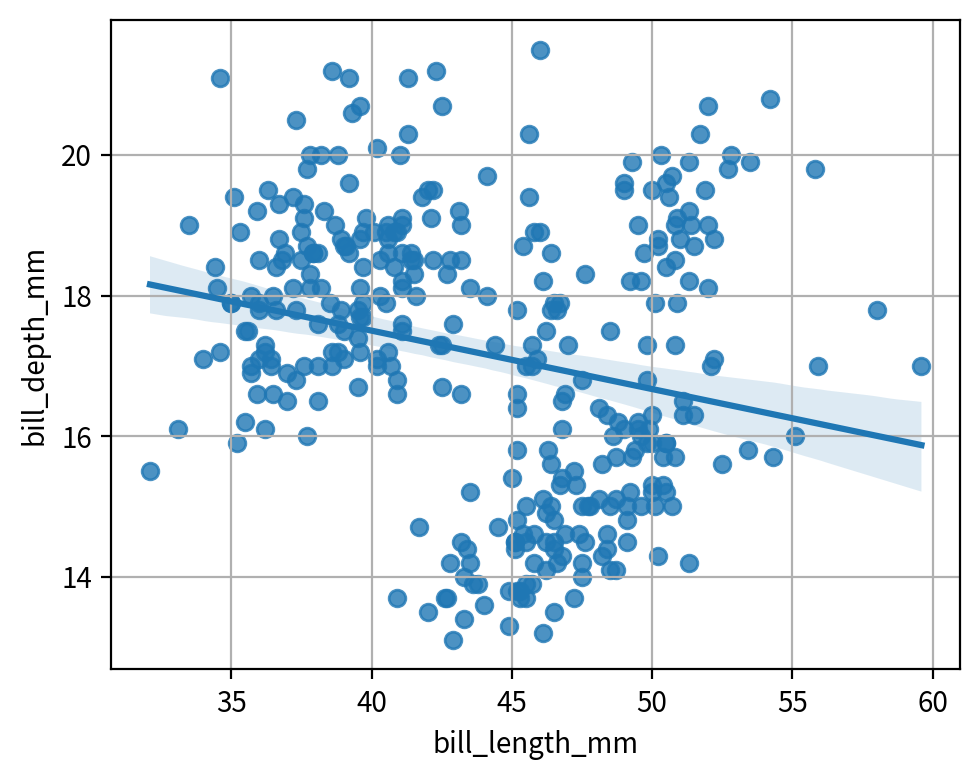

In [6]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#2) 그래프 그리기 -> seaborn 사용
# 2) regplot 그리기
# `fit_reg=False` 파라미터를 추가할 경우 추세선이 표시되지 않는다. (scatterplot과동일해짐)
# `scatter=False` 파라미터를 추가하면 산점도가 표시되지 않는다.(lineplot과 동일해짐)
# `scatterplot()`함수가 hue 파라미터를 적용하여 범주에 따라 구별할 수 있는 반면,RegPlot은 hue 파라미터를 적용할 수 없다.
sb.regplot(data=origin, x='bill_length_mm', y='bill_depth_mm')


#3) 그래프 꾸미기
ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()

#### LmPlot

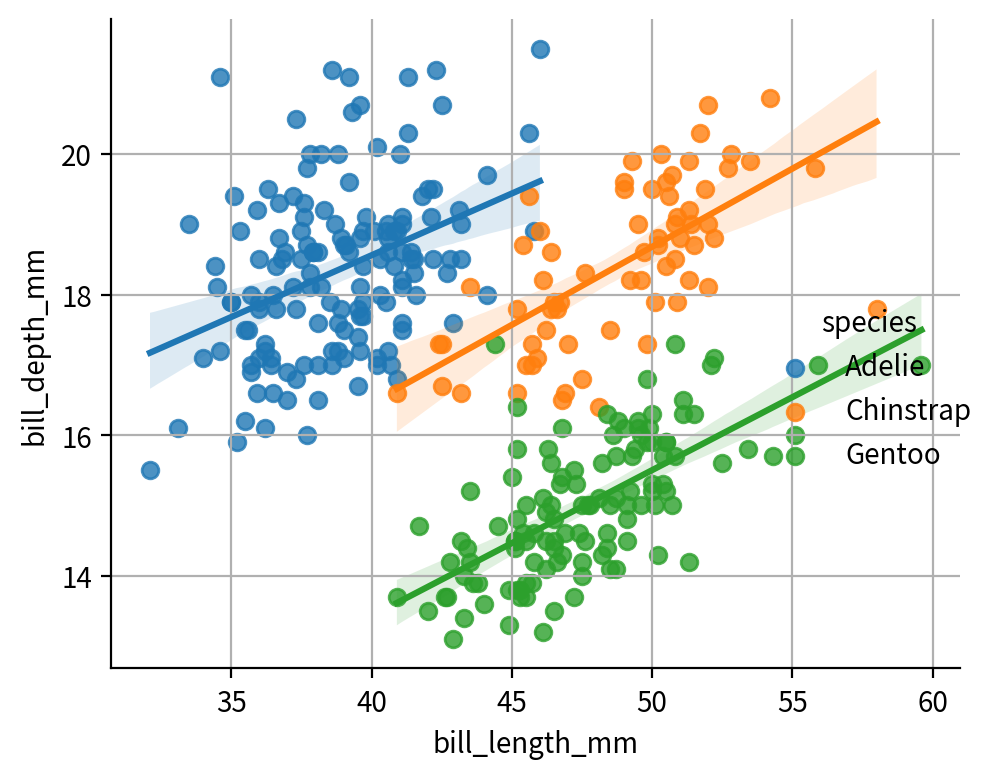

In [7]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
figsize = (width_px / my_dpi, height_px / my_dpi)

#2) 그래프 그리기 -> seaborn 사용
# 2) LM Plot 그리기
# 그래프를 꾸미기 위해서 lmplot() 메서드로부터 리턴되는 객체(`g`)를 활용해야 함
g = sb.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm",hue="species")
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


#3) 그래프 꾸미기
ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()

#### 2. 조건별 병렬 시각화

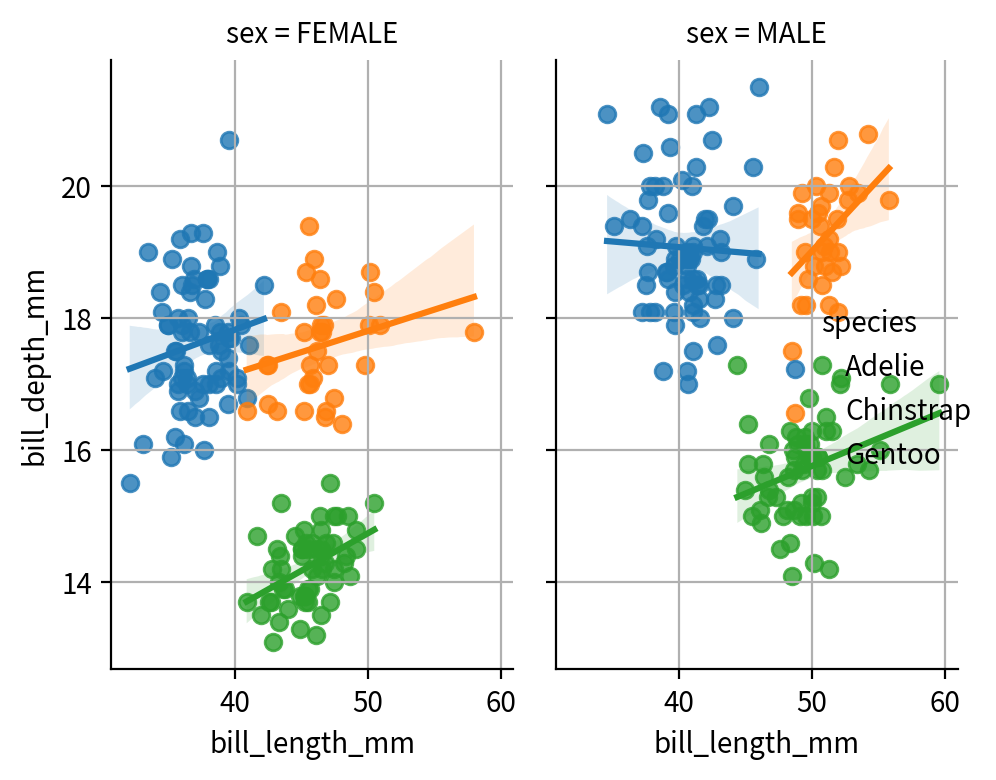

In [8]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1000
height_px = 800
figsize = (width_px / my_dpi, height_px / my_dpi)

#2) 그래프 그리기 -> seaborn 사용
# 2) LM Plot 그리기
# 그래프를 꾸미기 위해서 lmplot() 메서드로부터 리턴되는 객체(`g`)를 활용해야 함
g = sb.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm",hue="species",col='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


#3) 그래프 꾸미기
for ax in g.axes.flatten():
    ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()

#### 3. 모든 조건에 따라 행,열로 분할

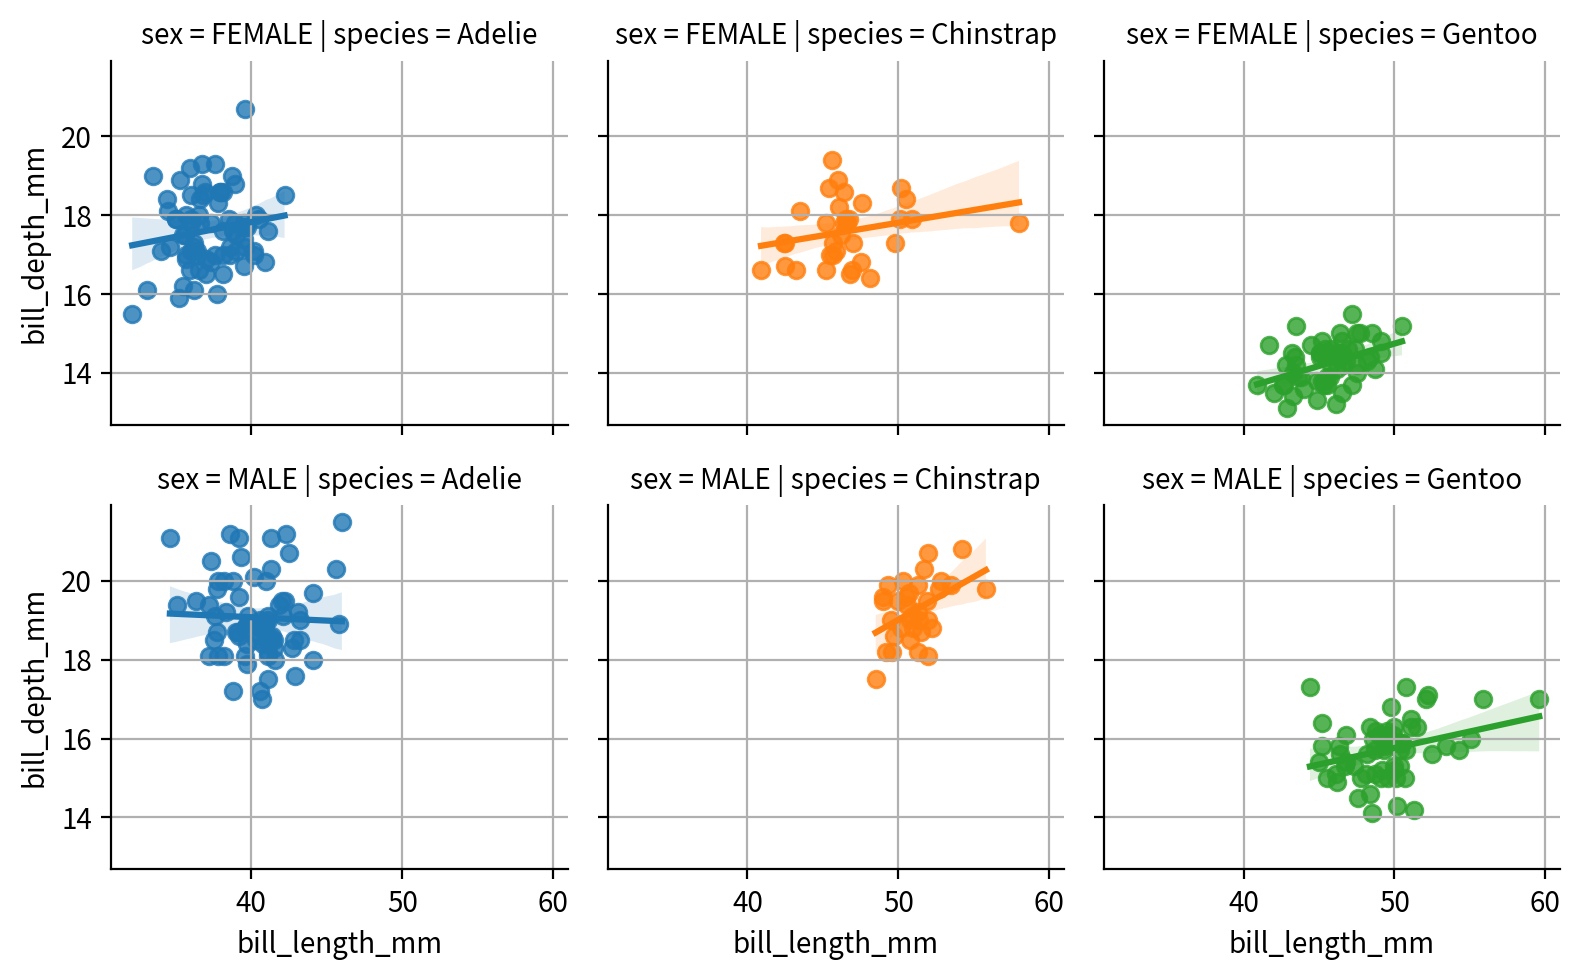

In [10]:
# 1) 그래프 초기화 (캔바스(fig)와 도화지(ax) 준비하기)
width_px = 1600
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)

#2) 그래프 그리기 -> seaborn 사용
# 2) LM Plot 그리기
# 그래프를 꾸미기 위해서 lmplot() 메서드로부터 리턴되는 객체(`g`)를 활용해야 함
g = sb.lmplot(data=df, x="bill_length_mm", y="bill_depth_mm",hue="species", col="species", row='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()


#3) 그래프 꾸미기
for ax in g.axes.flatten():
    ax.grid(True)


# 4) 출력

plt.tight_layout()
#plt.savefig("myplot.png", dpi=my_dpi)
plt.show() # 그래프 화면 출력
plt.close()

#### #04. PairPlot (산점도 행)

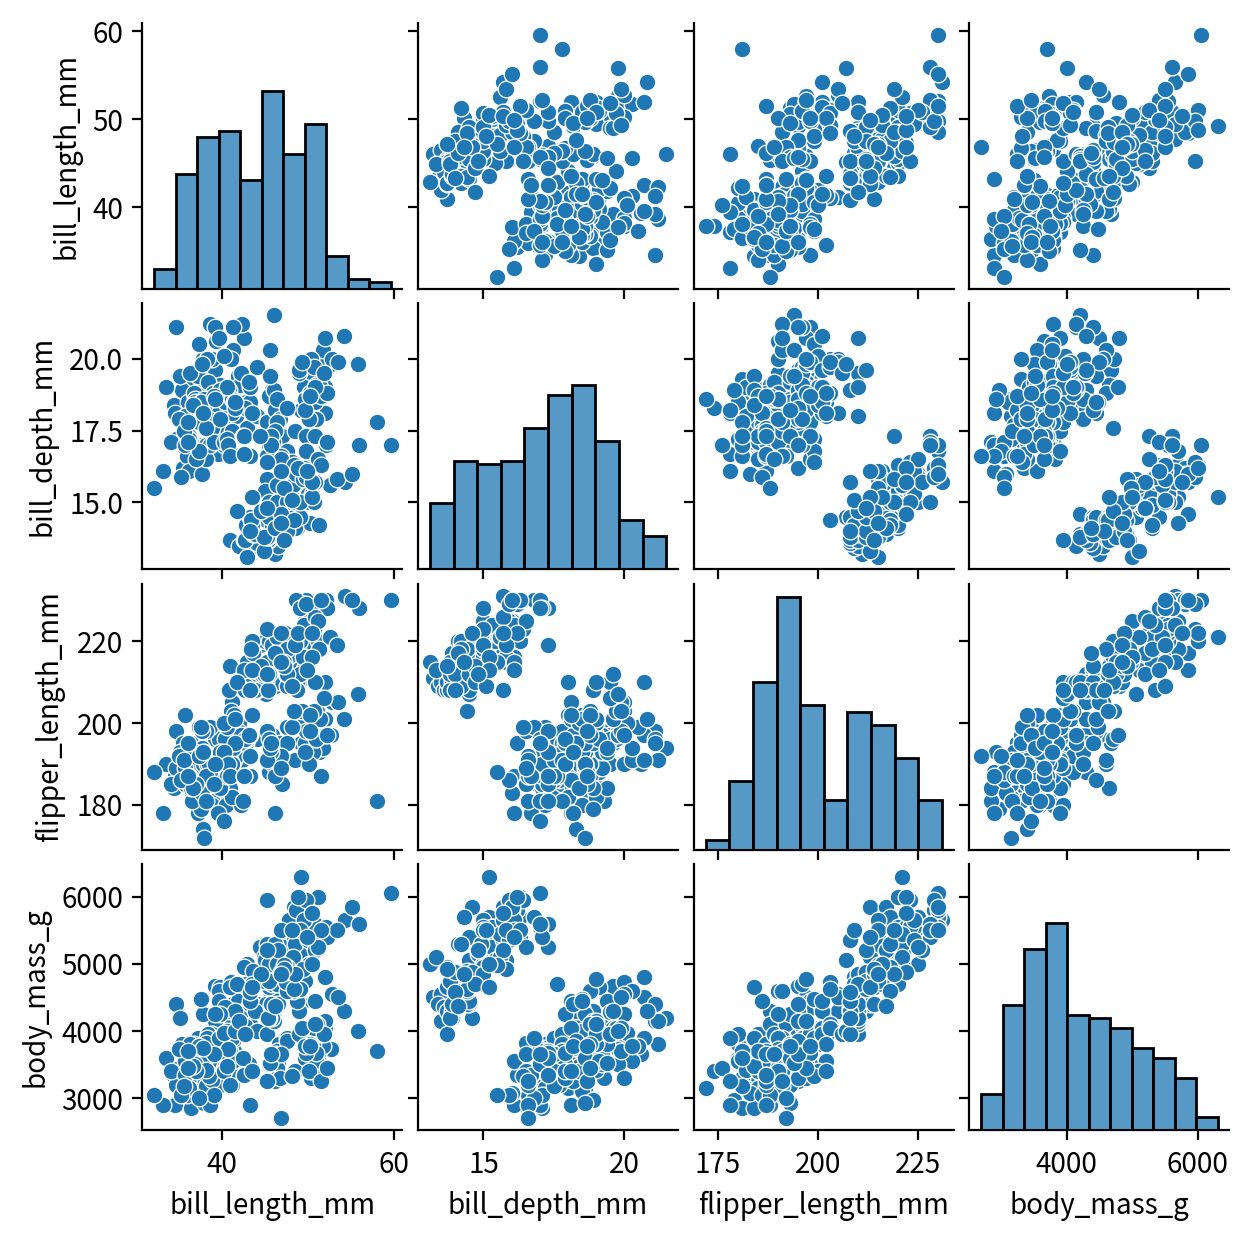

In [11]:
# 1) 그래프 초기화
width_px = 1200 # 그래프 가로 크기
height_px = 1200 # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
# 2) Pait Plot 그리기
# `corner=True` 파라미터를 추가할 경우 아래쪽 삼각형만 플롯된다.
g = sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
# 3) 출력
plt.grid()
plt.show()
plt.close()

#### 범주별 구분

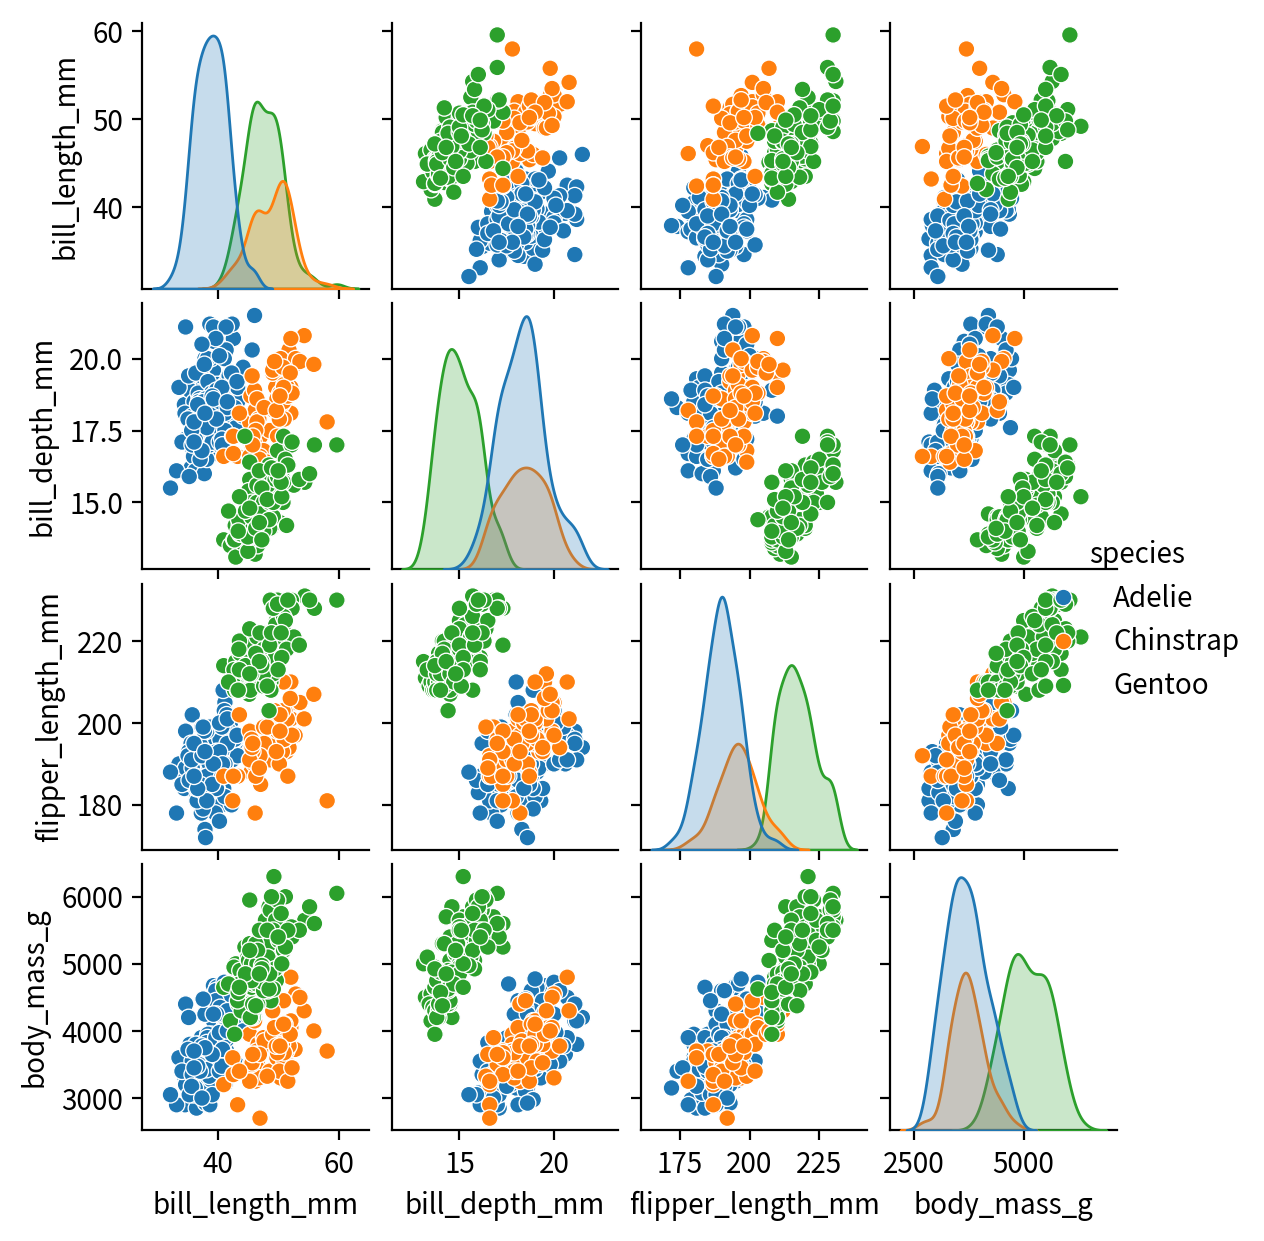

In [16]:
# 1) 그래프 초기화
width_px = 1200 # 그래프 가로 크기
height_px = 1200 # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
# 2) Pait Plot 그리기
# `diag_kind` 파라미터에 `hist`값을 적용한다.
# -> 적용 가능한 값: `auto`, `hist`, `kde`(기본값)
g = sb.pairplot(df, hue='species', diag_kind='kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
# 3) 출력
plt.grid()
plt.show()
plt.close()

#### 3. 선택적 변수 적용
x_vars 파라미터와 y_vars 파라미터에 원하는 변수를 리스트 타입으로 지정한다.

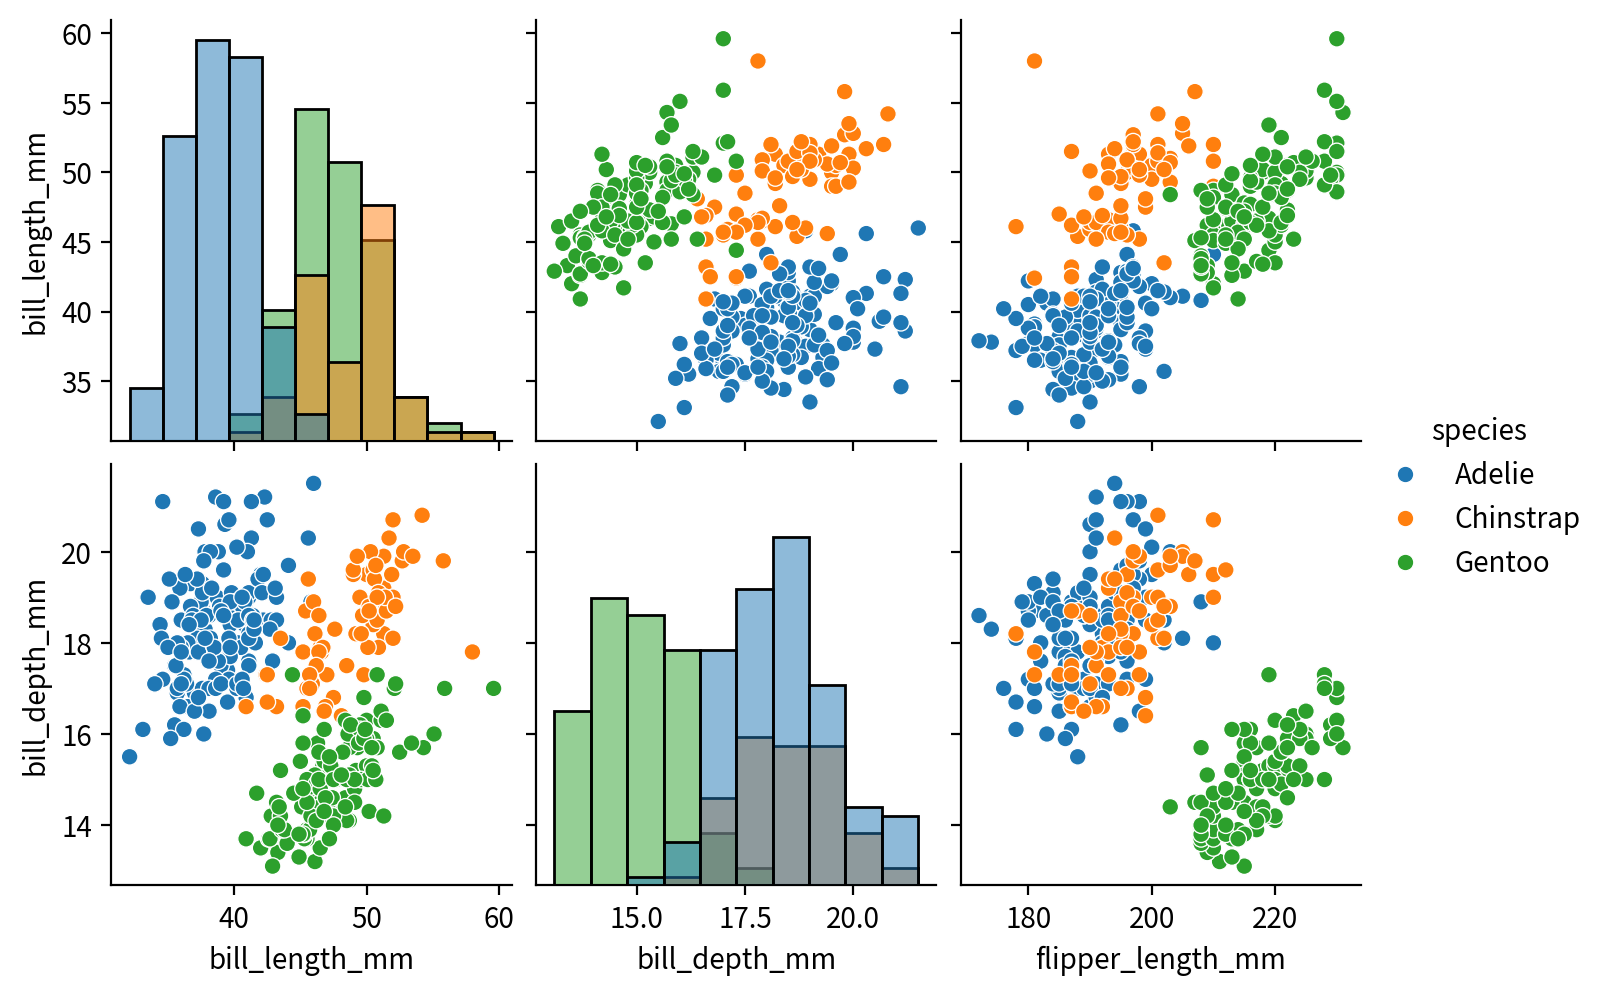

In [18]:
# 1) 그래프 초기화
width_px = 1600 # 그래프 가로 크기
height_px = 1000 # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
# 2) Pait Plot 그리기
g = sb.pairplot(df, hue='species', diag_kind='hist',
x_vars=["bill_length_mm", "bill_depth_mm",
"flipper_length_mm"],
y_vars=["bill_length_mm", "bill_depth_mm"])
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
# 3) 출력
plt.grid()
plt.show()
plt.close()

#### 데이터를 그룹별로 묶어서 표시하기
pairplot() 메서드가 리턴하는 객체를 받아서 map_lower()메서드를 호출한다.
map_lower() 메서드에 다른 종류의 함수 이름을 적용하면 대각선 기준으로 서로 다른 종류의 시각화 결
과물을 표시할 수 있다.

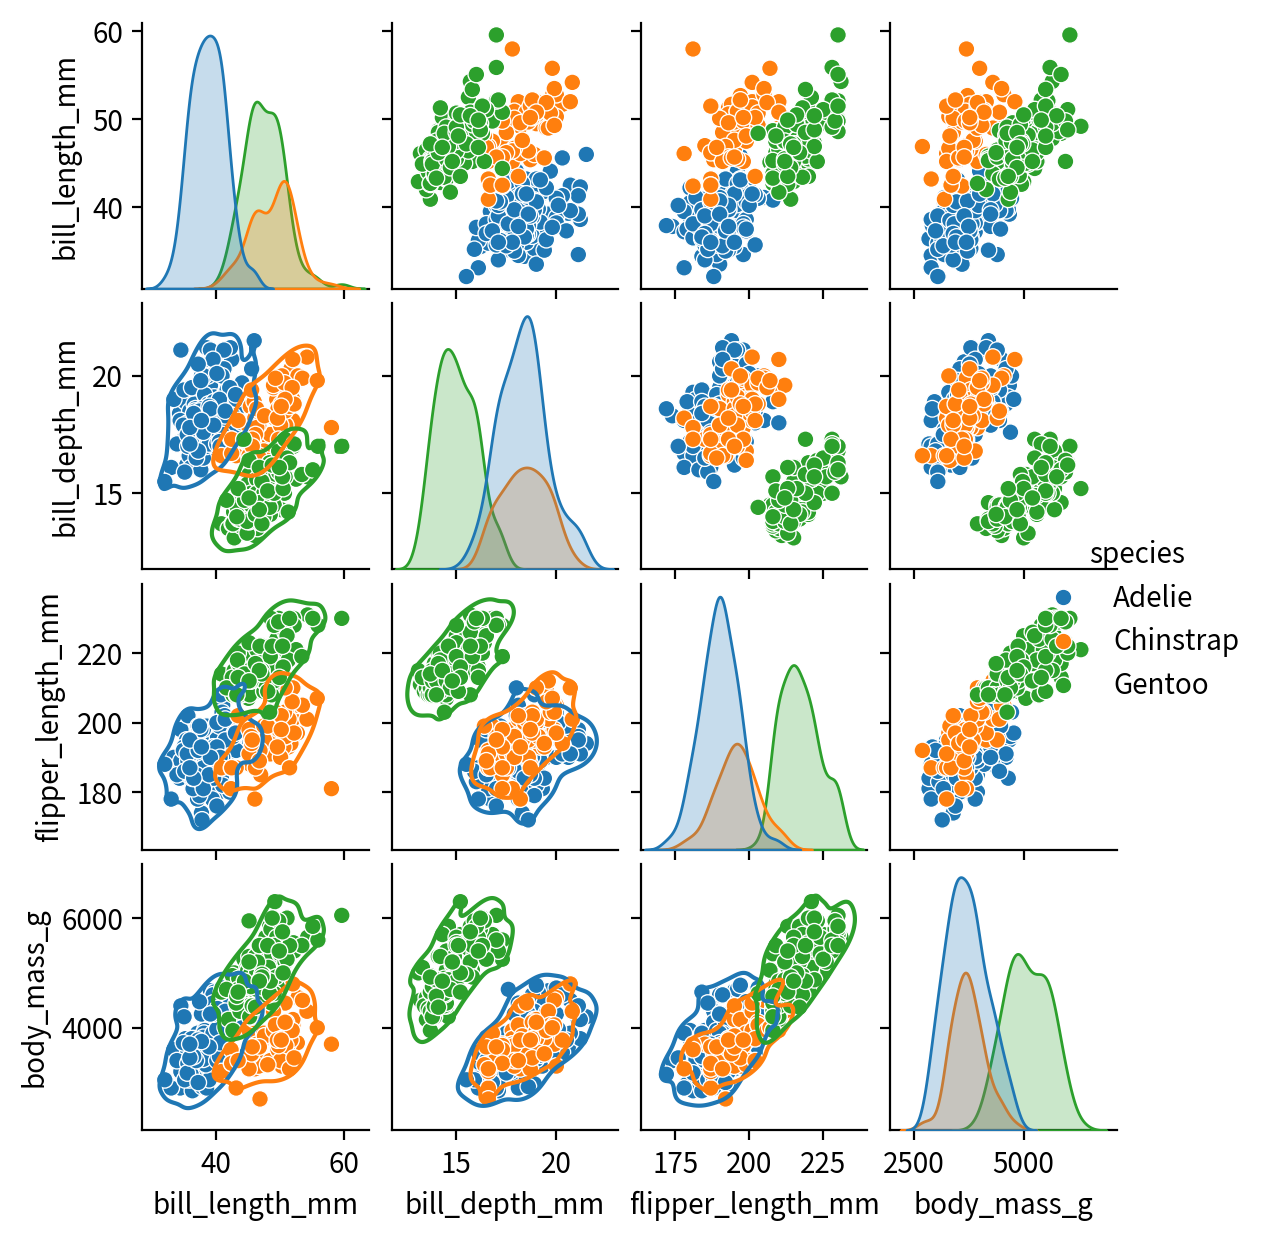

In [19]:
# 1) 그래프 초기화
width_px = 1200 # 그래프 가로 크기
height_px = 1200 # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
# 2) Pait Plot 그리기
g = sb.pairplot(df, hue='species')
g.map_lower(sb.kdeplot, levels=1, color=0.2)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
# 3) 출력
plt.grid()
plt.show()
plt.close()